In [10]:
# Data manipulation
import numpy as np
import pandas as pd

# System and paths
import pathlib

# Custom modules
from src.utils import load_data

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_palette('colorblind')
sns.set_style('whitegrid')
mpl.rcParams['font.family'] = 'Arial'

In [11]:
# Load data
data = load_data([0,151])

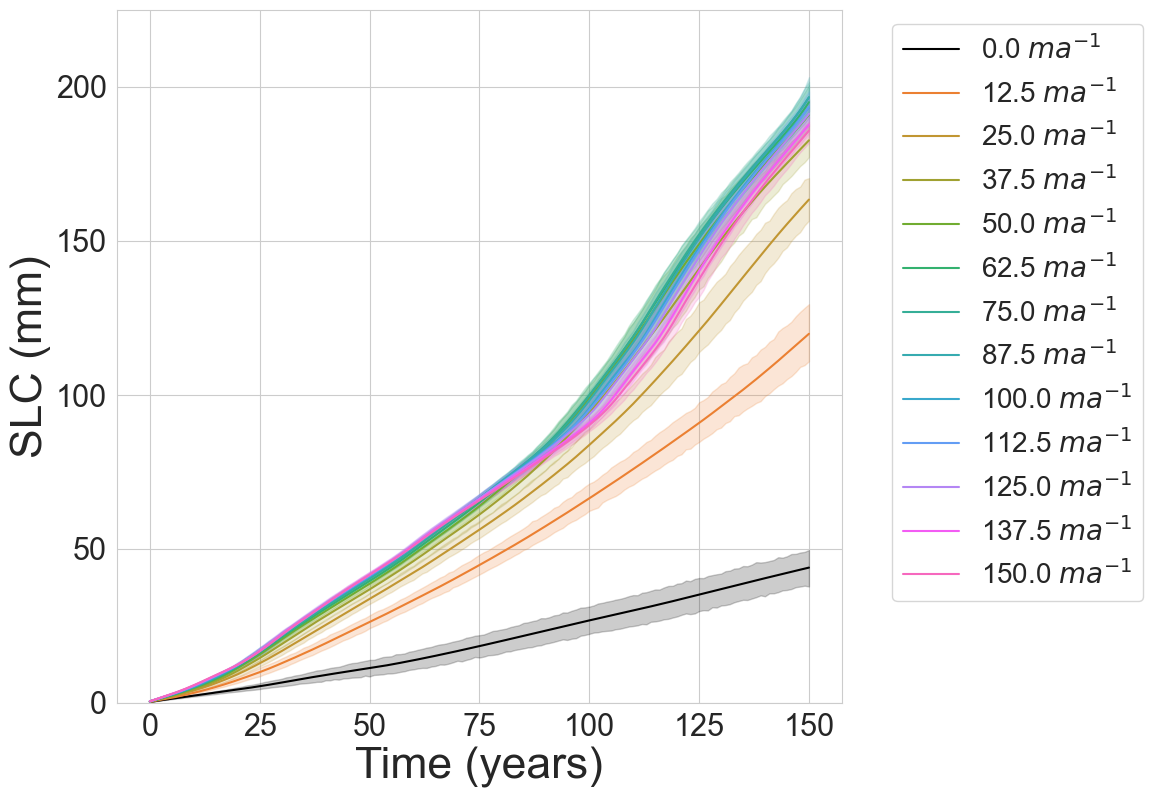

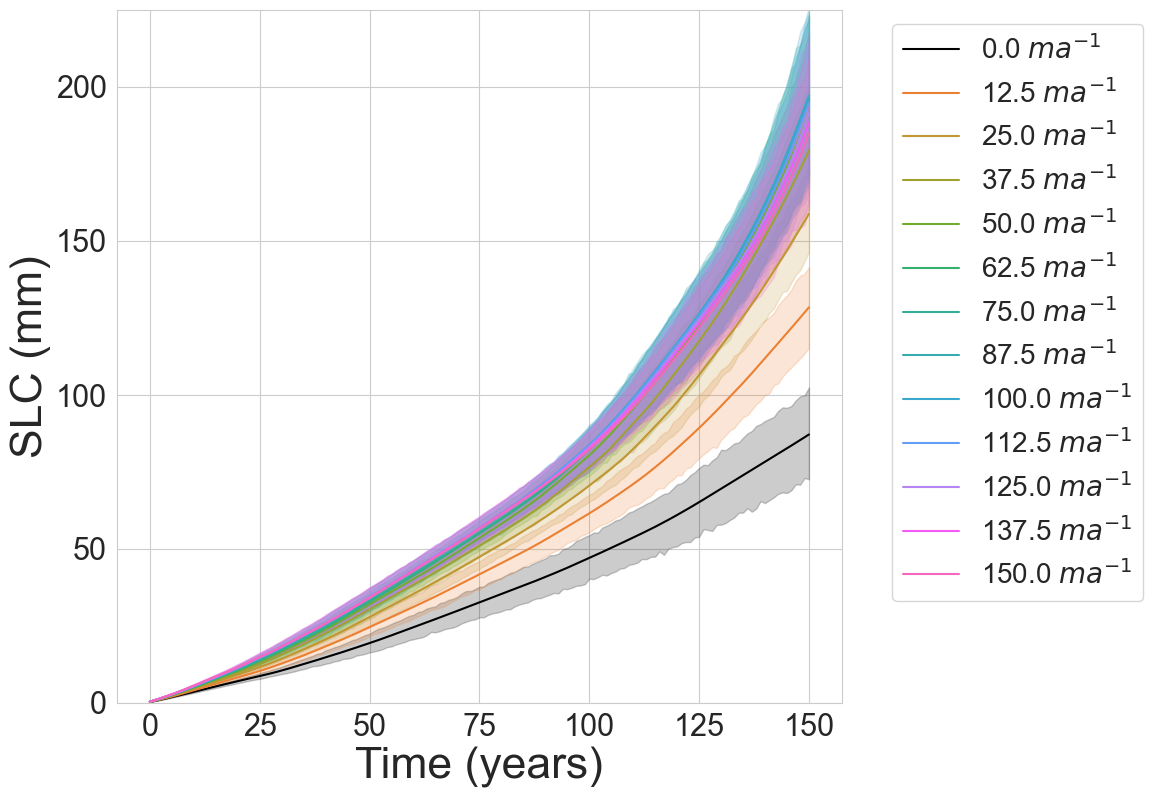

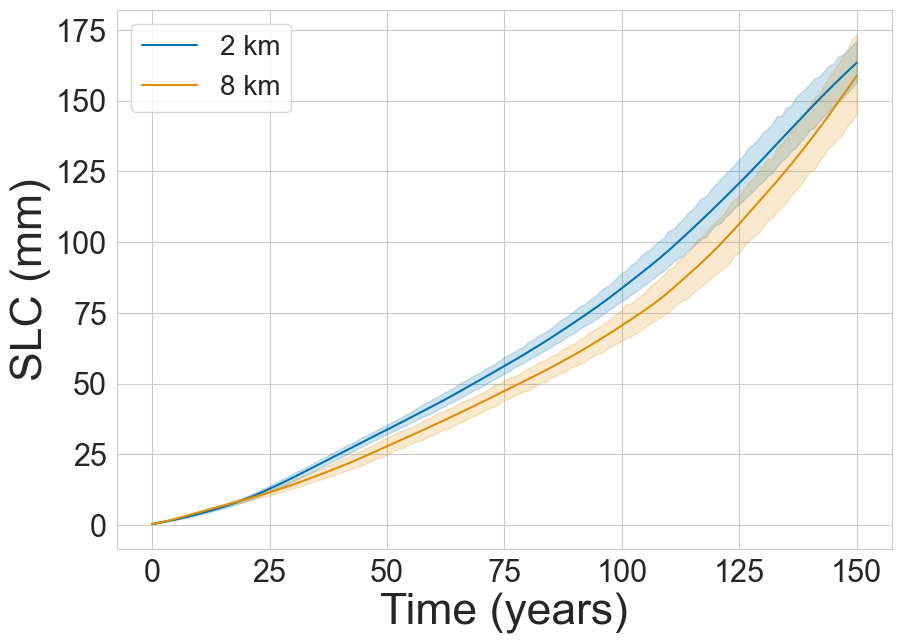

In [12]:
# Figure 2

def find_nearest(array, value):
    """Find nearest value in array to given value"""
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def setup_plot_style(ticksize=22, label=32):
    """Set up common plot styling"""
    plt.xticks(np.arange(0, 151, 25), fontsize=ticksize)
    plt.yticks(fontsize=ticksize)
    plt.xlabel("Time (years)", fontsize=label)
    plt.ylabel("SLC (mm)", fontsize=label)

def create_melt_plot(data, options, fidelity=2):
    """Create plot varying melt rates"""
    # Filter and process data
    data_sub = data[data["resolution"] == fidelity].copy()
    data_sub['melt_average'] = data_sub['melt_average'].apply(lambda x: find_nearest(options, x))
    data_sub["Melt average"] = data_sub["melt_average"].astype(str) + r' $ma^{-1}$'

    # Create plot
    plt.figure(figsize=(10, 9))
    palette = sns.color_palette("husl", len(data_sub['Melt average'].unique()))
    colors = {melt: color for melt, color in zip(data_sub["Melt average"].unique(), palette)}
    colors["0.0 "+r'$ma^{-1}$'] = "black"

    sns.lineplot(data=data_sub, x="years", y="SLC", hue="Melt average", palette=colors, legend=True)
    setup_plot_style()
    plt.yticks([0, 50, 100, 150, 200], fontsize=22)
    plt.ylim(0, 225)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
    plt.subplots_adjust(right=0.85)

    plt.savefig("./../assets/plots/fig_2/vary_melt_{fidelity}.pdf", bbox_inches='tight')

def create_resolution_plot(data, options, melt_value=25):
    """Create plot comparing different resolutions"""
    # Filter and process data
    data_sub = data[data["resolution"].isin([2,8])].copy()
    data_sub['melt_average'] = data_sub['melt_average'].apply(lambda x: find_nearest(options, x))
    data_sub = data_sub[data_sub["melt_average"] == melt_value]
    data_sub["Resolution"] = data_sub["resolution"].astype(str) + " km"

    # Create plot
    plt.figure(figsize=(10,7))
    sns.lineplot(data=data_sub, x="years", y="SLC", hue="Resolution")
    setup_plot_style()
    plt.legend(fontsize=20)

    plt.savefig("./../assets/plots/fig_2/vary_res.pdf", bbox_inches='tight')

# Define options array
options = np.array([0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150])

# Create both plots
create_melt_plot(data, options)
create_melt_plot(data, options, fidelity=8)

create_resolution_plot(data, options)